## Adjacency Generation

In [109]:
import pandas as pd
import numpy as np
from collections import OrderedDict
TF_gene = pd.read_csv("network_tf_gene.txt",skiprows=34, header=None,usecols=[0,1,2,4], delimiter='\t')
TF_gene = TF_gene.apply(lambda x: x.astype(str).str.lower())
TF_gene = TF_gene[(TF_gene[4] == 'strong')&((TF_gene[2]=='-')|(TF_gene[2]=='+'))]
TF_gene = TF_gene.drop_duplicates(subset=[0,1])
#TF_gene[[0]].unique()
TF = list(TF_gene[0].unique())
Gene = list(TF_gene[1].unique())
Total = list(OrderedDict.fromkeys(TF+Gene))
Total = np.array(Total)
Total
print("TFs:\t%d"%len(TF))
print("Genes:\t%d"%len(Gene))
print("Total:\t%d"%len(Total))
#len(TF_gene)

TFs:	144
Genes:	1034
Total:	1094


In [131]:
Adj = np.zeros([len(Total),len(Total)])
#for i in range(len(TF_gene)):
TF_gene.iloc[0][0]
tmp = TF_gene.iloc[0]
for i in range(len(TF_gene)):
    row = np.where(Total == TF_gene.iloc[i][0])[0][0]
    col = np.where(Total == TF_gene.iloc[i][1])[0][0]
    if (TF_gene.iloc[i][2] == '+'):
        Adj[row][col] = 1
    else:
        Adj[row][col] = -1
selfEdge = np.diag(Adj**2).sum()
print(Adj)
print(selfEdge)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
61.0


## Random networks

In [120]:
se = []
for i in range(500):
    a = np.random.permutation(TF_gene[1])
    selfEdge = len(np.where(TF_gene[0]==a)[0])
    se.append(selfEdge)
avg = np.mean(se)
print(avg)
print(np.std(se))
Nself_orig = len(np.where(TF_gene[0]==TF_gene[1])[0])
Z = (Nself_orig - avg)/np.std(se)
print("Z-score:",Z)

1.306
1.1542807284192178
Z-score: 51.7153223910709


## negative autoregulation vs. simple gene regulation

In [121]:
def nautoreg(X,t,Beta,alpha,K,n):
    f = Beta/(1+(X/K)**n)
    dX = f - (alpha*X)
    return dX

def simplereg(X,t,B,a):
    dX = B - (a*X)
    return dX

In [143]:
from scipy.optimize import fsolve

t = np.linspace(0,5,1000)
beta = 4
alpha = 3
k = 3
n = 2
steady = fsolve(nautoreg,args=(t,beta,alpha,k,n),x0=k)
print(steady[0])

beta_s = steady* alpha
print(beta_s[0])

1.159931270216737
3.479793810650211


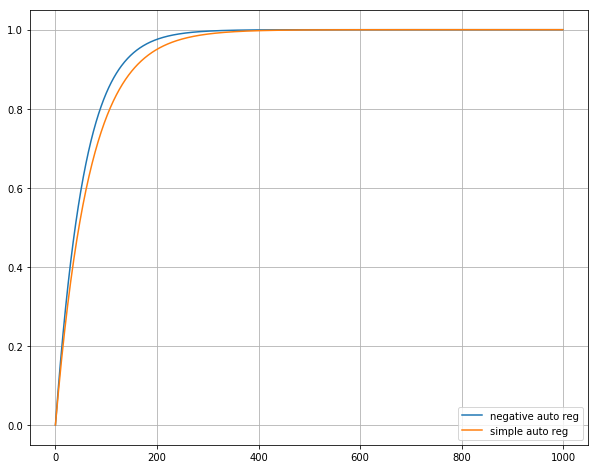

In [150]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import math
neg_auto = odeint(nautoreg,0,t,args=(beta,alpha,k,n))
simp_auto = odeint(simplereg,0,t,args=(beta_s,alpha))

resp_auto = k/(beta*2)

resp_simp = math.log(2)/alpha
plt.figure(figsize=(10,8))
plt.plot(neg_auto/steady,label='negative auto reg')
plt.plot(simp_auto/steady,label='simple auto reg')
plt.legend()
plt.grid()